# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [68]:
x = df['temperature']

In [69]:
plt.hist(x, bins='auto', facecolor='green', alpha=0.75)

(array([  2.,   4.,   8.,  11.,  26.,  18.,  30.,  17.,  10.,   1.,   2.,
          0.,   1.]),
 array([  96.3       ,   96.64615385,   96.99230769,   97.33846154,
          97.68461538,   98.03076923,   98.37692308,   98.72307692,
          99.06923077,   99.41538462,   99.76153846,  100.10769231,
         100.45384615,  100.8       ]),
 <a list of 13 Patch objects>)

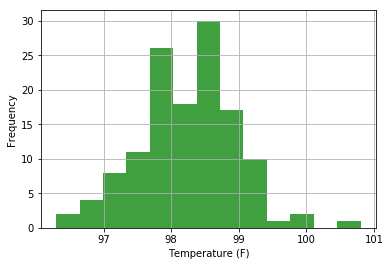

In [70]:
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [71]:
print('Mean of temperature', np.mean(x))
print('Median of temperature', np.median(x))
print('Mode of temperature', stats.mode(x))

# Performs normal test
import scipy.stats as stats

def isNormal(data):
    z, p = stats.mstats.normaltest(data)
    
    if (p < 0.055):
        print('The data is more likely NOT normally distributed')
    else:
        print('The data is more likely normally distributed')
        
isNormal(x)

Mean of temperature 98.24923076923078
Median of temperature 98.3
Mode of temperature ModeResult(mode=array([ 98.]), count=array([11]))
The data is more likely normally distributed


### 1) Is the distribution of body temperatures normal?

This is a normal distribution because mean, median and mode are close

### 2) Is the sample size large? Are the observations independent?

Yes, because no of observation is more than 30. Observations are independent according to the data source description as random sample.

### 3) Is the true population mean really 98.6 degrees F?

    Would you use a one-sample or two-sample test? Why?

        One-sample test will be used, because we are comparing the dataset with a population mean.

    In this situation, is it appropriate to use the  $t$  or  $z$ statistic?

        $z$ statistic is more appropriate since the sample size is large
        
We set the hypothesis test with the following:

$H_0$: The mean of the sample and the true mean of 98.6 are the same. $\mu=\mu_0$

$H_A$: The means are different. $\mu\neq\mu_0$

In [72]:
sample_mean = np.mean(x)
sample_sd = np.std(x)

z = (sample_mean - 98.6)/(sample_sd/np.sqrt(x.count()))

print('z score is: ',z)

p_z = stats.norm.sf(abs(z))*2

print('P(|z| > -5.476) =', p_z)

z score is:  -5.47592520208
P(|z| > -5.476) = 4.35231516588e-08


Since the z score is very low and the p value is extremely small as well, therefore, we has to reject the null hypothese

Next, we try to plug in the number into $t$ test to see the result. Since the t and z value are approximately the same.

In [73]:
# Performs t test
t = z
print('t =', t)

p_t = stats.t.sf(np.abs(t), len(x)-1)*2
print('P(|t| >= 5.476) =', p_t)

t = -5.47592520208
P(|t| >= 5.476) = 2.18874646241e-07


The p value is different but still small enough to reject the null hypothese.

### 4) Draw a small sample of size 10 from the data and repeat both tests. 
      Which one is the correct one to use? 
      What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [74]:
# Draws random sample of 10
sample = np.random.choice(x, size=10)

sample

array([ 98.4,  97.2,  98.8,  97.8,  98. ,  98.4,  97.9,  97.2,  97.7,  98.2])

In [75]:
# Performs t test with 10 samples

t2 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))

print('t =', t2)

p_t2 = stats.t.sf(np.abs(t), len(sample)-1)*2
print('p = ', p_t2)

t = -4.12774388144
p =  0.000392231622671


In [76]:
# Performs z test with 10 samples

z2 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))

print('z =', z2)

p_z2 = stats.norm.sf(abs(z))*2
print('p =', p_z2)

z = -4.12774388144
p = 4.35231516588e-08


The p value result is different significantly, which mean if a wrong statistics is picked for a small samples case, one may end up with a wrong conclusion. For this case sample size is smaller than 30, $t$ statistics should be used. 

### 5) At what temperature should we consider someone's temperature to be "abnormal"?

    Start by computing the margin of error and confidence interval.


In [77]:
# Calculates margin of error for sample mean with 95% confidence

print('The mean temperature of the data is', np.mean(x))
print('The standard deviation of temperature of the data is', np.std(x))

z = 1.96 # this is the value of z for 95% confidence from table

error = z * np.std(x) / np.sqrt(len(x))

print('margin of error for a sample mean =', error)

The mean temperature of the data is 98.24923076923078
The standard deviation of temperature of the data is 0.7303577789050377
margin of error for a sample mean = 0.125550964803


With 95% confidence interval of mean temperature,  any number 98.25 +/- 0.126 will be treated as abnormal.

### 6) Is there a significant difference between males and females in normal temperature?

    What test did you use and why?
    Write a story with your conclusion in the context of the original problem.
    
To compare two samples we should use two-sample test 

We can set the hypothese test as below:

$H_0$: There is no difference in the distribution and means of males and females.

$H_A$: There is a difference in the distribution and means of males and females.

In [78]:
#Separate into male and female dataset

male_temperature = df[df['gender'] == 'M']['temperature']
female_temperature = df[df['gender'] == 'F']['temperature']

#Test statistics

z = (np.mean(male_temperature) - np.mean(female_temperature))/np.sqrt((np.std(male_temperature)**2/len(male_temperature))+(np.std(female_temperature)**2/len(female_temperature)))
print('z =',z)


z = -2.30322028919


z score is smaller than -1.96 which correspond to alpha = 0.05, therefore, we has to reject the null hypothese. Which means the average temperature of male and female is not the same.

### Conclusion
The mean normal body temperature was held to be 37 degree C or 98.6 degree F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. However, this value is not statistically correct. The mean normal body temperature was computed with 95% confidence to be between 98.124 and 98.376. There is also a statistically significant difference in the means between males and females.